In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('EDA_Data.csv', index_col = 0)

In [3]:
df.head()

,main_category,currency,goal,state,backers,country,usd_pledged,total_days
0,Publishing,GBP,1000.0,failed,0,GB,0.0,58.0
1,Film & Video,USD,45000.0,failed,3,US,220.0,45.0
2,Music,USD,5000.0,failed,1,US,1.0,30.0
3,Film & Video,USD,19500.0,canceled,14,US,1283.0,55.0
4,Food,USD,50000.0,successful,224,US,52375.0,35.0


In [4]:
df.dtypes

main_category     object
currency          object
goal             float64
state             object
backers            int64
country           object
usd_pledged      float64
total_days       float64
dtype: object

#setting it so that any successful projects are labeled 1, everything else is 0 
df.loc[df['state'] != 'successful', 'state'] = 0
df.loc[df['state'] == 'successful', 'state'] = 1

#should I make the state column binary? 
preprocessing.label_binarize

In [7]:
#separating the categorical/object data types

dfo = df[['main_category', 'currency', 'country']]

In [8]:
#getting dummies for categoritcal values and adding to the main dataframe while deleting the original features

df = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

In [9]:
#creating X and y values, since we are trying to predict the state of the project, this will be our y

X = df.drop('state', axis = 1)
y = df['state']

In [33]:
from sklearn import preprocessing 
y = preprocessing.label_binarize(y, classes = ['successful'])


In [34]:
#splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
#finding the best max_depth parameter through gridsearch

decision_tree = DecisionTreeClassifier()
grid_param = {'max_depth': np.arange(3,10),}
#can try to add max_samples_split or max_samples_leaf but it might be computationally expensive and take a lot of time. 

tree_gridsearchcv = GridSearchCV(decision_tree, grid_param)

tree_gridsearchcv.fit(X_train, y_train)
tree_gridsearchcv.best_params_

{'max_depth': 9}

In [36]:
#retraining decision tree model based off of best max_depth param of 9
#do we need to retrain, or can we use the tree_gridsearchcv to predict? 

decision_tree = DecisionTreeClassifier(max_depth = 9)
decision_tree = decision_tree.fit(X_train, y_train)
tree_y_pred = decision_tree.predict(X_test)


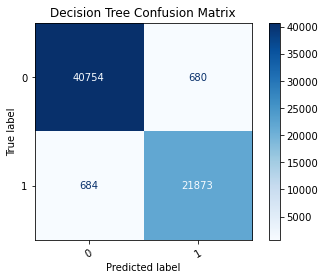

In [37]:
from sklearn import metrics

metrics.plot_confusion_matrix(decision_tree, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Decision Tree Confusion Matrix')
plt.xticks(rotation=30)
plt.show()

The confusion matrix shows that our model was pretty great at predicting which projects failed, did decently to predict which projects were successful, but everything lese, the model did a poor job of predicting correctly. For the most part, this isn't too bad, but for example, the 681 that were true successfuls, but our tree model predicted that it failed, that is an area we might be able tune a bit more for better results. 

In [38]:
print(metrics.classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     41434
           1       0.97      0.97      0.97     22557

    accuracy                           0.98     63991
   macro avg       0.98      0.98      0.98     63991
weighted avg       0.98      0.98      0.98     63991



In [39]:
#which average should we use? How do you we know? weighted vs. micro
#why are all the scores the same if we use micro? 

tree_precision = metrics.precision_score(y_test, tree_y_pred, average ='weighted')
tree_recall = metrics.recall_score(y_test, tree_y_pred, average = 'weighted')
tree_f1 = metrics.f1_score(y_test, tree_y_pred, average = 'weighted')

print('Precision Score:', tree_precision)
print('Recall Score:', tree_recall)
print('F1 Score:', tree_f1)


Precision Score: 0.9786836496000224
Recall Score: 0.9786845025081652
F1 Score: 0.9786840718825996
